In [1]:
# @title Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import hashlib
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors


# Set seed for reproducibility
SEED = random.randint(1, 1000)
np.random.seed(SEED)
random.seed(SEED)

In [2]:
# @title Load & Preprocess Data

# Load the data again since it was redefined previously
df = pd.read_csv('marketing_campaign.csv', sep='\t')

# Display the first few rows of the dataset
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


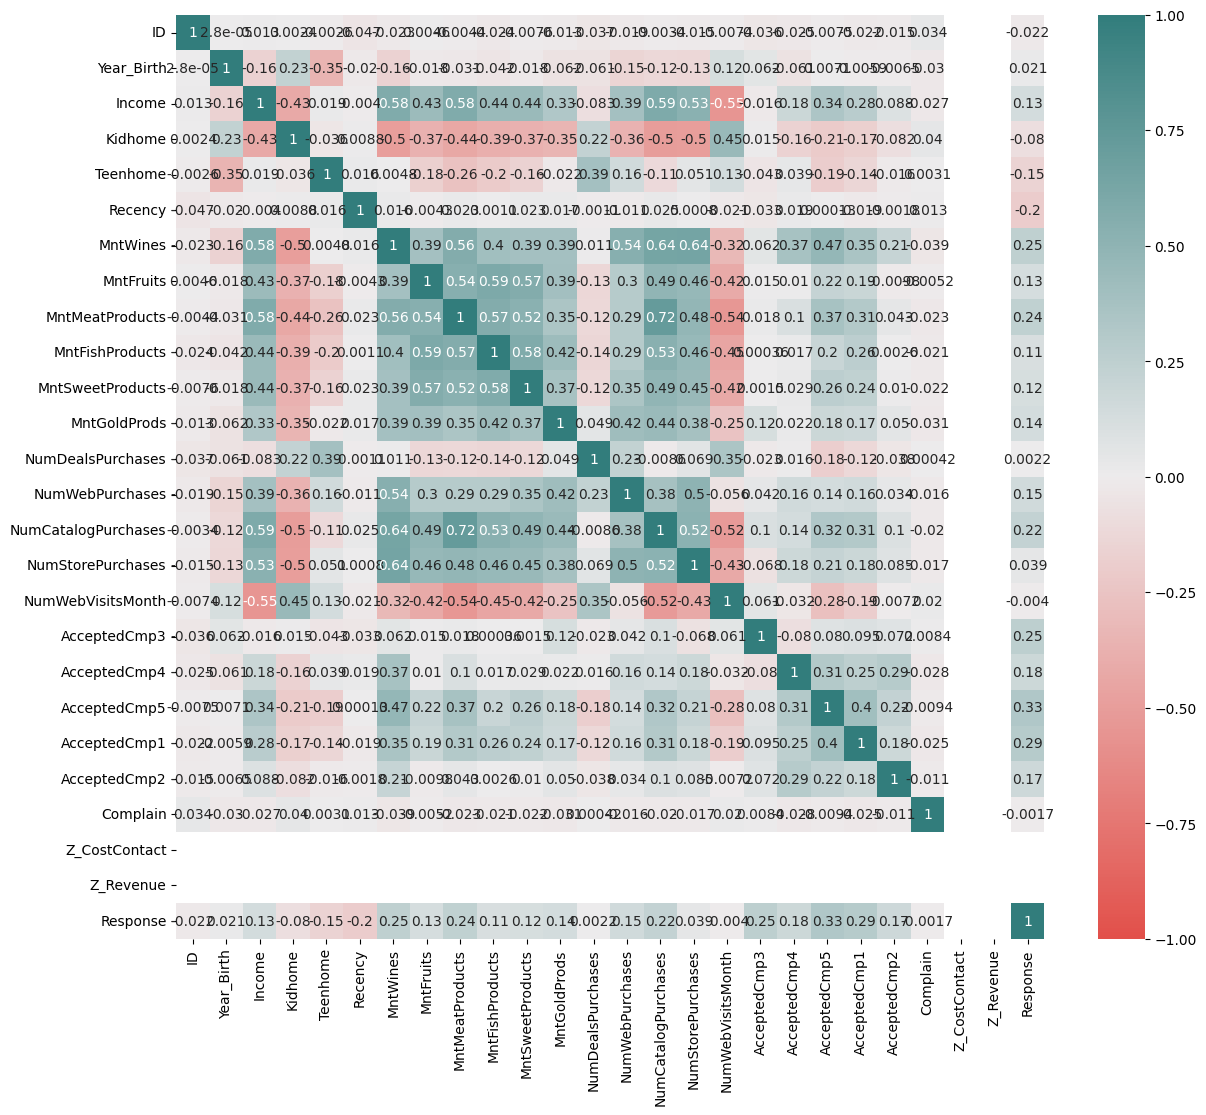

In [3]:
# @title Correlation Matrix
# Import necessary modules
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap
# Define the custom colormap
colors = ["#E2504A", "#EDEBEC", "#327D7C"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Example correlation matrix
corr_df= df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(14,12))
sns.heatmap(corr_df, cmap=cmap, center=0, vmin=-1, annot=True)
plt.show()

In [4]:
# @title Identifying Data

# Dataset size
print('Data points and Columns:', df.shape)

# Dataset information
print(df.info())

# Check for null values
print('Null Values:', (df.isnull().sum()))

# Check for duplicate values
print('Duplicate Values:', (df.duplicated().sum()))

# Summarize the dataset
print('Dataset Summary:')
df.describe().T

Data points and Columns: (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  Nu

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


Based on the initial data exploration, we find out that;

*   The dataset has 29 columns consisting 2,240 observations.

*   Most of the columns are numerical.

*   There are three categorical columns; 'marital_status', 'education', and 'Dt_customer'.
*   The 'marital_status' and 'education' columns contain categories that can be considered synonymous.
*   'Dt_customer' needs to be converted to a numerical date type.
*   The 'income' column has 24 missing values.
*   We did not detect any duplicate entries.
*   Some outliers are present in some numerical columns.


In [5]:
# @title Data Engineering
# Load the data again since it was redefined previously
df = pd.read_csv('marketing_campaign.csv', sep='\t')

print("Number of unique values in Z_CostContact column:", df['Z_CostContact'].nunique())
print("Number of unique values in Z_Revenue column:", df["Z_Revenue"].nunique())

# Remove unnecessary columns ('Id' and columns with 1 unique value)
df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

# Standardize 'Marital_Status' into 2 broader groups
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'Partner')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')

# Standardize 'Education' into 3 broader groups
df['Education'] = df['Education'].replace(['PhD', 'Master'], 'Postgraduate')
df['Education'] = df['Education'].replace(['2n Cycle', 'Graduation'], 'Graduate')
df['Education'] = df['Education'].replace(['Basic'], 'Undergraduate')

# Define categorical_columns here
categorical_columns = ['Education', 'Marital_Status']

for column in categorical_columns:
    print(f"Unique values in {column}:")
    print(df[column].unique())
    print("\n")

# Combining columns together to reduce the number of dimensions
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

# Converting date to numerical variable by calculating duration
data = df.copy()

# Calculate 'Days_as_client' before selecting columns
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
latest_date = df['Dt_Customer'].max()
df['Days_as_client'] = (latest_date - df['Dt_Customer']).dt.days
df.head()

df = df[['Education', 'Marital_Status', 'Income', 'Kids', 'Days_as_client', 'Recency', 'Expenses',
         'TotalNumPurchases', 'TotalAcceptedCmp', 'Complain', 'Response']]



Number of unique values in Z_CostContact column: 1
Number of unique values in Z_Revenue column: 1
Unique values in Education:
['Graduate' 'Postgraduate' 'Undergraduate']


Unique values in Marital_Status:
['Single' 'Partner']




Throughout the Data Cleaning and Feature Engineering process, several important actions were taken:

We developed a new feature that indicates the number of days each client has been with the company. Extraneous features were eliminated to make the dataset more efficient. The 'Marital_Status' and 'Education' variables were grouped into fewer, broader categories for consistency. Certain columns were merged to decrease the total number of columns in the dataset. Outliers were detected and removed to enhance the overall quality of the data. These steps were crucial for optimizing the dataset for analysis and ensuring its accuracy and relevance.

In [6]:
# @title Clean data
def load_and_preprocess():
    # Load data
    df = pd.read_csv('marketing_campaign.csv', sep='\t')
    df = df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1)
    df['Income'] = df['Income'].fillna(df['Income'].median())
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
    latest_date = df['Dt_Customer'].max()
    df['Tenure'] = (latest_date - df['Dt_Customer']).dt.days
    df = df.drop('Dt_Customer', axis=1)

    # One-Hot Encoding
    return pd.get_dummies(df, columns=['Education', 'Marital_Status'])

df = load_and_preprocess()

# Categorize columns into three groups based on their data type

binary_columns = [col for col in df.columns if df[col].nunique() == 2]
categorical_columns = [col for col in df.columns if 2 < df[col].nunique() < 10]
numerical_columns = [col for col in df.select_dtypes(include=['number']).columns
                     if col not in binary_columns + categorical_columns]


In [7]:
# @title Remove missing data and outliers

import numpy as np
# Remove missing values
df = df.dropna()

# Remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

numerical_cols = df.select_dtypes(include=np.number).columns
df = remove_outliers_iqr(df, numerical_cols)


In the context of income data, a Z-score of 24 suggests that this particular income is 24 standard deviations away from the mean, which is extraordinarily high. Such an extreme value is not only an outlier but may also represent a rare event or a data entry error.

Removing these outliers will help ensure the integrity of the statistical analysis. Doing so, we can enhance the reliability of our clustering results, leading to more accurate insights and conclusions.

Throughout the Data Cleaning and Feature Engineering process, several important actions were taken:

We developed a new feature that indicates the number of days each client has been with the company. Extraneous features were eliminated to make the dataset more efficient. The 'Marital_Status' and 'Education' variables were grouped into fewer, broader categories for consistency. Certain columns were merged to decrease the total number of columns in the dataset. Outliers were detected and removed to enhance the overall quality of the data. These steps were crucial for optimizing the dataset for analysis and ensuring its accuracy and relevance.

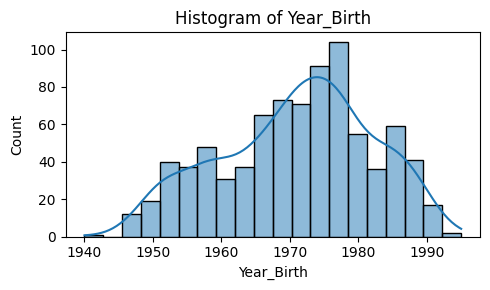

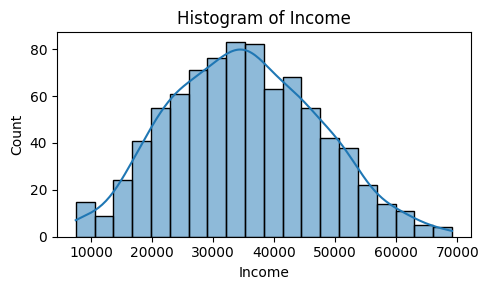

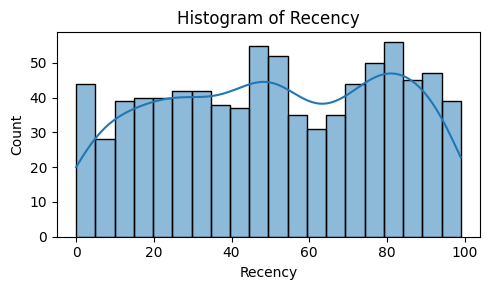

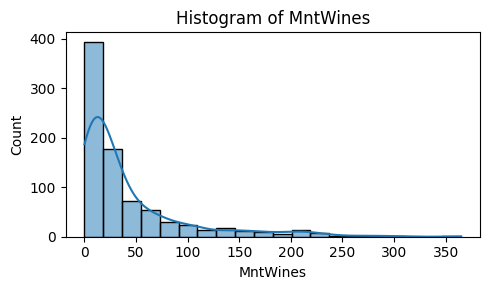

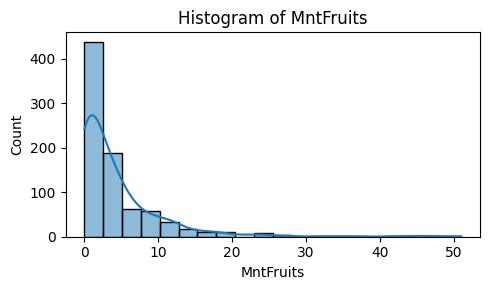

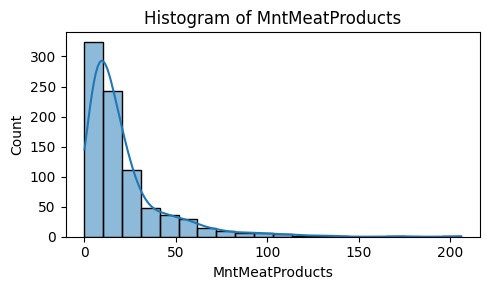

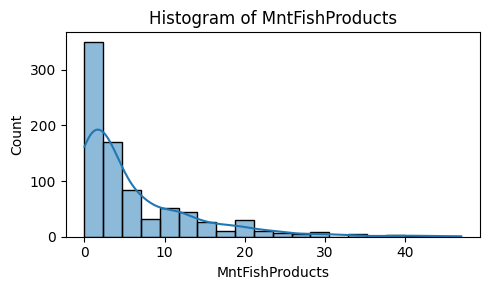

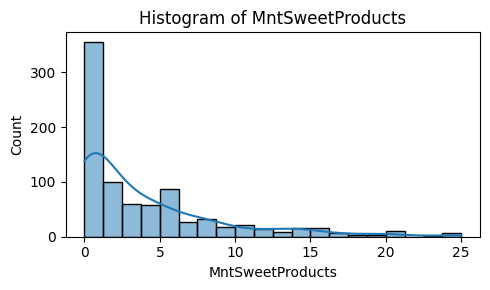

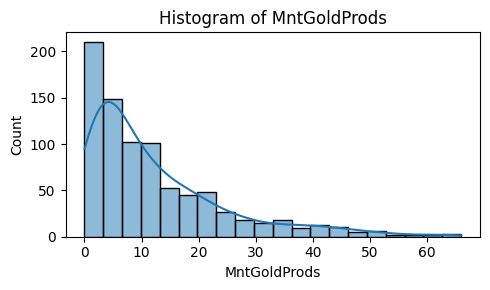

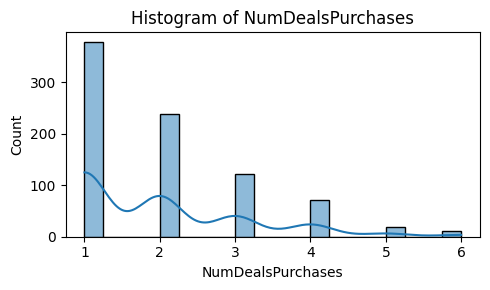

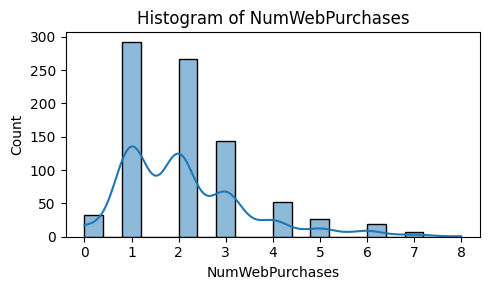

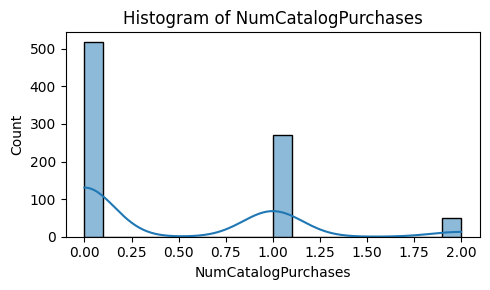

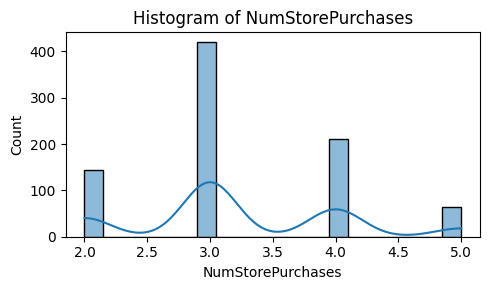

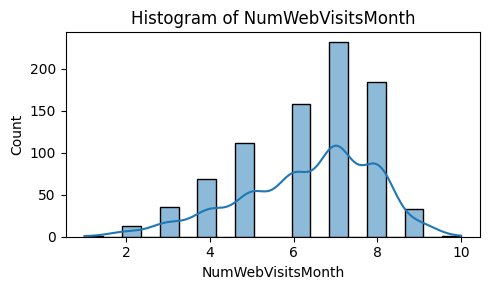

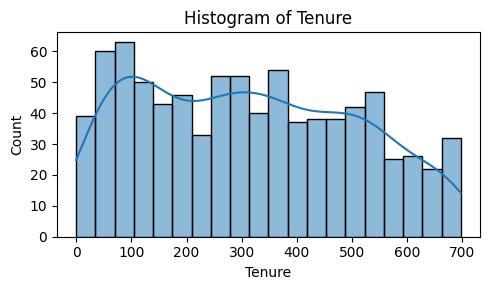

In [8]:
# @title Exploratory Data Analysis

# Plot histograms for each numerical column
for column in numerical_columns:

    plt.figure(figsize=(5, 3))
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f'Histogram of {column}')

    plt.tight_layout()
    plt.show()



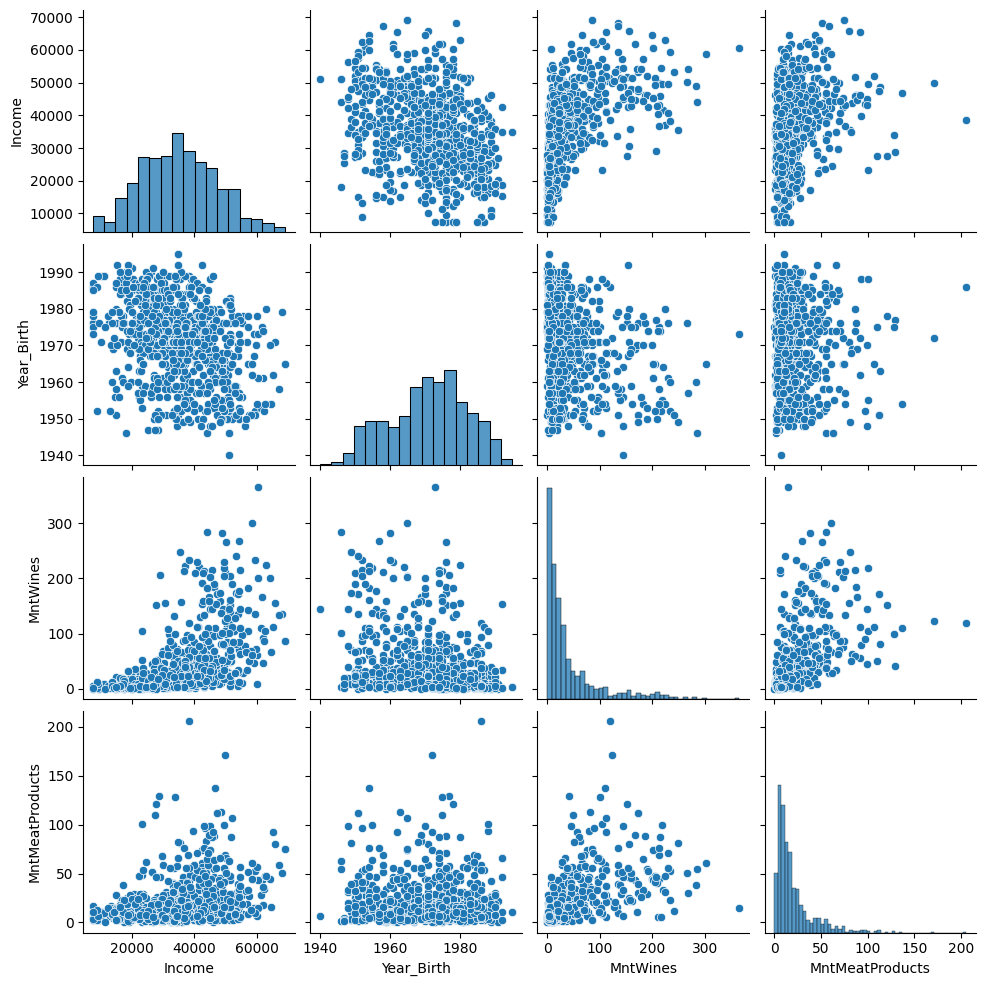

In [9]:
# @title Visualize relationships between multiple variables

sns.pairplot(df[['Income', 'Year_Birth', 'MntWines', 'MntMeatProducts']])
plt.show()

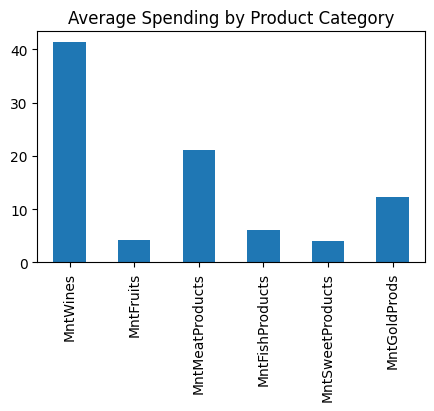

In [10]:

# @title Average Spending by Product Category
# Spending Patterns
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
plt.figure(figsize=(5, 3))
df[spending_cols].mean().plot(kind='bar')
plt.title('Average Spending by Product Category')
plt.show()



Key Insights from the Visualizations:

After filtering out outliers, income exhibits a normal distribution. This indicates that most customers have earnings close to the average, with fewer individuals at the higher and lower extremes.
Both variables display a relatively uniform distribution, suggesting that customers have been associated with the company for diverse durations and have engaged with it over a broad time span.
The distribution of expenses follows an exponential trend, meaning most customers spend relatively little, and the number of high spenders decreases rapidly as expenditure increases.
This metric aligns with a binomial distribution, reflecting common purchasing patterns where customers tend to make a specific number of transactions.
A significant proportion of customers are graduates, have one child, are in a relationship, have not submitted complaints in the last two years, and have not participated in past promotional campaigns. This suggests the company serves a well-defined customer segment.
Income, expenses, and total purchases show strong correlations, implying that individuals with higher incomes tend to spend more and make more purchases.

In [11]:
# @title Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

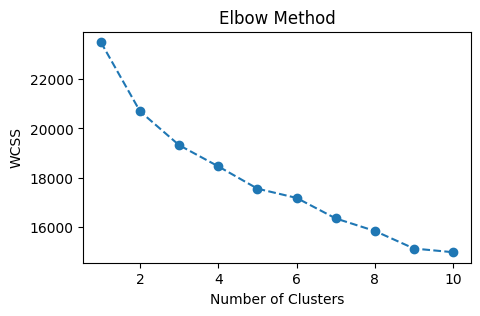

In [12]:
# @title Optimal Cluster Determination with Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(5, 3))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
# @title Silhouette Score for KMeans, DBSCAN and, Hierarchical clustering

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # Replace 3 with your optimal k
kmeans_labels = kmeans.fit_predict(scaled_df)
kmeans_silhouette = silhouette_score(scaled_df, kmeans_labels)
print(f"KMeans Silhouette Score: {kmeans_silhouette}")

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5) # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(scaled_df)

# Calculate Silhouette Score for DBSCAN only if there's more than one cluster
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(scaled_df, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
else:
    print("DBSCAN: Only one cluster found, cannot calculate silhouette score.")

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3) # Replace 3 with your optimal k
hierarchical_labels = hierarchical.fit_predict(scaled_df)
hierarchical_silhouette = silhouette_score(scaled_df, hierarchical_labels)
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette}")


KMeans Silhouette Score: 0.08420609509239535
DBSCAN: Only one cluster found, cannot calculate silhouette score.
Hierarchical Clustering Silhouette Score: 0.16910279657842564


In [14]:
# @title Using Fine tuned Cluster Algorithms

import numpy as np
# @title Fine-tuning Clustering Algorithms
def fine_tune_kmeans(scaled_df):
    """Fine-tunes KMeans clustering."""
    best_score = -1
    best_kmeans = None
    for n_clusters in range(3, 6):  # Try different numbers of clusters
        for init in ['k-means++', 'random']:  # Try different initialization methods
            for max_iter in [300, 500]:  # Try different maximum iterations
                kmeans = KMeans(n_clusters=n_clusters, init=init, max_iter=max_iter, random_state=SEED)
                kmeans_labels = kmeans.fit_predict(scaled_df)
                silhouette_avg = silhouette_score(scaled_df, kmeans_labels)
                if silhouette_avg > best_score:
                    best_score = silhouette_avg
                    best_kmeans = kmeans
    return best_kmeans

def fine_tune_dbscan(scaled_df):
    """Fine-tunes DBSCAN clustering."""
    best_score = -1
    best_dbscan = None
    for eps in np.linspace(0.5, 5, 10):  # Try different epsilon values
        for min_samples in range(5, 15):  # Try different minimum samples
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan_labels = dbscan.fit_predict(scaled_df)
            if len(set(dbscan_labels)) > 1:  # Ensure more than one cluster is found
                silhouette_avg = silhouette_score(scaled_df, dbscan_labels)
                if silhouette_avg > best_score:
                    best_score = silhouette_avg
                    best_dbscan = dbscan
    return best_dbscan

def fine_tune_hierarchical(scaled_df):
    """Fine-tunes Hierarchical clustering."""
    best_score = -1
    best_agg = None
    for n_clusters in range(3, 6):  # Try different numbers of clusters
        for linkage in ['ward', 'complete', 'average']:  # Try different linkage methods
            agg = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
            agg_labels = agg.fit_predict(scaled_df)
            silhouette_avg = silhouette_score(scaled_df, agg_labels)
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_agg = agg
    return best_agg


# Fine-tune the clustering algorithms
best_kmeans = fine_tune_kmeans(scaled_df)
best_dbscan = fine_tune_dbscan(scaled_df)
best_agg = fine_tune_hierarchical(scaled_df)

# Use the best models for clustering
kmeans_labels = best_kmeans.fit_predict(scaled_df)
dbscan_labels = best_dbscan.fit_predict(scaled_df)
agg_labels = best_agg.fit_predict(scaled_df)

# Evaluate and analyze the results of the fine-tuned models
print("KMeans Silhouette Score:", silhouette_score(scaled_df, kmeans_labels))
print("DBSCAN Silhouette Score:", silhouette_score(scaled_df, dbscan_labels))
print("Hierarchical Silhouette Score:", silhouette_score(scaled_df, agg_labels))

KMeans Silhouette Score: 0.1748763863490605
DBSCAN Silhouette Score: 0.1783847553161504
Hierarchical Silhouette Score: 0.3322131256383399


In [15]:
# @title Cluster Characterization (Fine-Tuned Models)
def characterize_clusters_tuned(labels, method_name, scaled_df):
    df[f'{method_name}_Cluster'] = labels
    # Select only numeric columns for the mean calculation
    numeric_cols = df.select_dtypes(include=np.number).columns
    cluster_profile = df.groupby(f'{method_name}_Cluster')[numeric_cols].mean()
    print(f"\n{method_name.capitalize()} Cluster Profiles:")
    print(cluster_profile[['Income', 'MntWines', 'MntMeatProducts',
                          'NumDealsPurchases', 'NumWebPurchases']])
    return cluster_profile

# Characterize fine-tuned models
characterize_clusters_tuned(kmeans_labels, 'kmeans_tuned', scaled_df)
characterize_clusters_tuned(dbscan_labels, 'dbscan_tuned', scaled_df)
characterize_clusters_tuned(agg_labels, 'hierarchical_tuned', scaled_df)


Kmeans_tuned Cluster Profiles:
                            Income    MntWines  MntMeatProducts  \
kmeans_tuned_Cluster                                              
0                     20362.738095    2.666667         7.452381   
1                     43208.990385  105.625000        48.384615   
2                     33203.686757   21.314092        12.370119   

                      NumDealsPurchases  NumWebPurchases  
kmeans_tuned_Cluster                                      
0                              1.666667         1.595238  
1                              2.855769         3.658654  
2                              1.701188         1.585739  

Dbscan_tuned Cluster Profiles:
                            Income    MntWines  MntMeatProducts  \
dbscan_tuned_Cluster                                              
-1                    43323.416667  104.366667        62.966667   
 0                    35003.044952   38.331950        18.561549   
 1                    20604.300000   

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Tenure,kmeans_tuned_Cluster,dbscan_tuned_Cluster,hierarchical_tuned_Cluster
hierarchical_tuned_Cluster,,,,,,,,,,,,,,,,,,,,,
0,1970.916368,35073.548984,0.782557,0.494624,51.232975,41.373955,4.229391,21.07049,6.0454,3.9773,...,0.0,0.0,0.0,0.0,0.0,0.0,312.322581,1.654719,0.016726,0.0
1,1988.000000,34176.000000,1.000000,0.000000,12.000000,5.000000,7.000000,24.00000,19.0000,14.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,48.000000,1.000000,-1.000000,1.0
2,1986.000000,8940.000000,1.000000,0.000000,25.000000,1.000000,45.000000,3.00000,4.0000,6.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,676.000000,0.000000,-1.000000,2.0


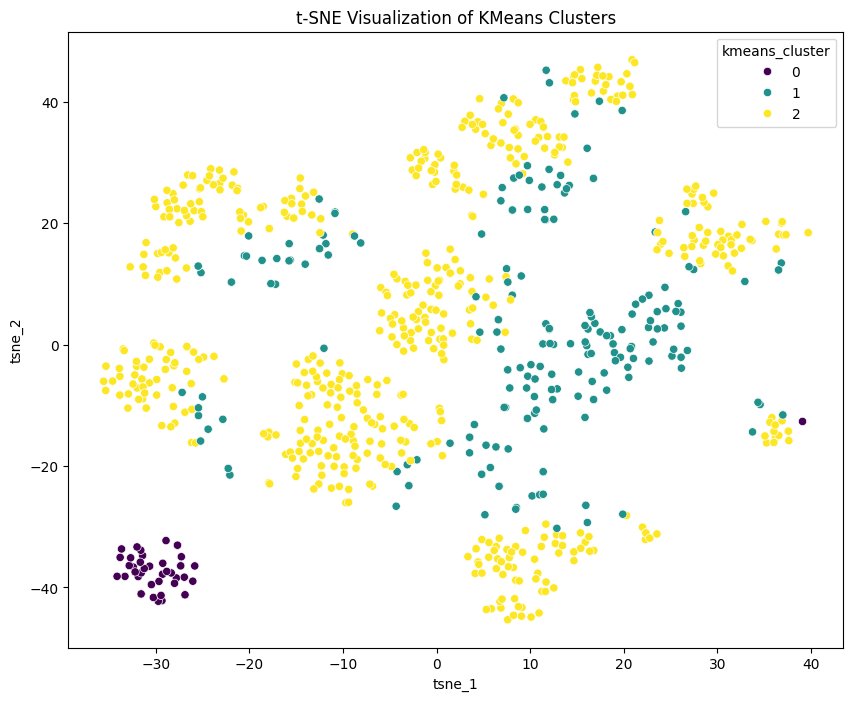

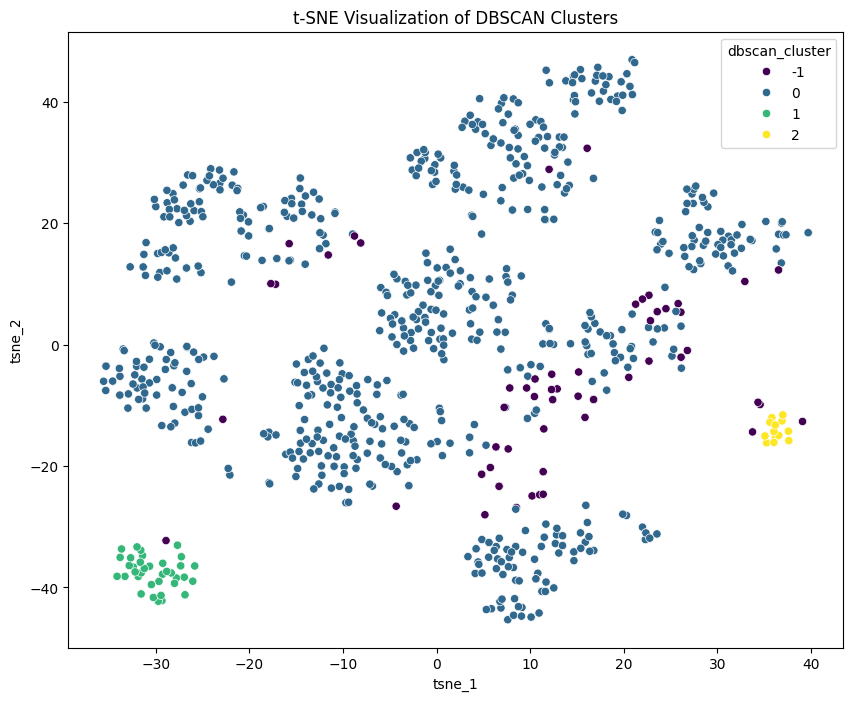

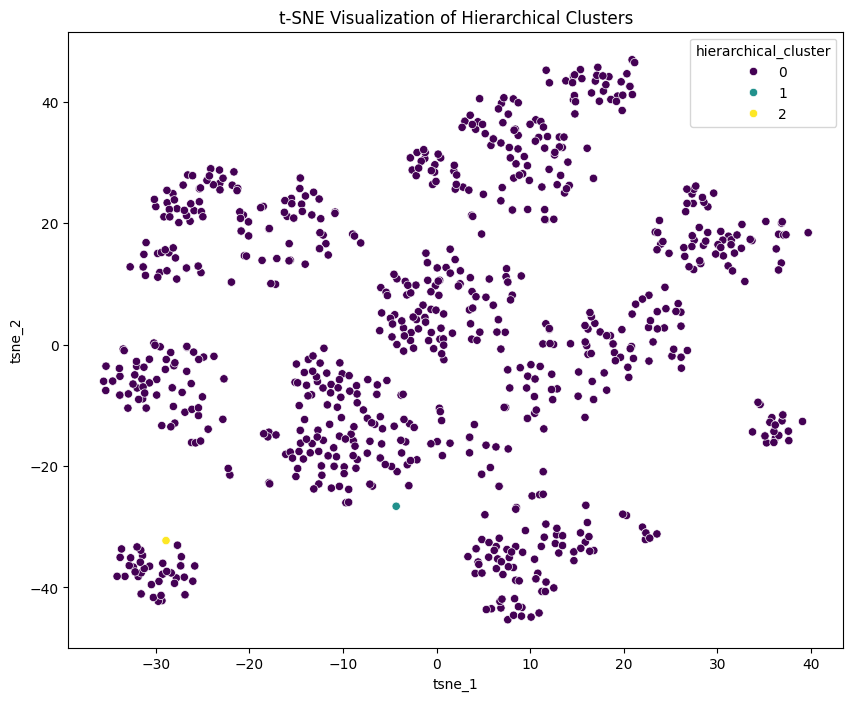

In [16]:
# @title TSNE for Fine-Tuned Models

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming 'scaled_df' contains your scaled data
# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=SEED)
tsne_results = tsne.fit_transform(scaled_df)

# Create a new DataFrame with the t-SNE results and cluster labels
tsne_df = pd.DataFrame({'tsne_1': tsne_results[:, 0], 'tsne_2': tsne_results[:, 1],
                       'kmeans_cluster': kmeans_labels, 'dbscan_cluster': dbscan_labels,
                       'hierarchical_cluster': agg_labels})

# Visualize the clusters in the t-SNE reduced space
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='kmeans_cluster', data=tsne_df, palette='viridis')
plt.title('t-SNE Visualization of KMeans Clusters')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='dbscan_cluster', data=tsne_df, palette='viridis')
plt.title('t-SNE Visualization of DBSCAN Clusters')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='hierarchical_cluster', data=tsne_df, palette='viridis')
plt.title('t-SNE Visualization of Hierarchical Clusters')
plt.show()


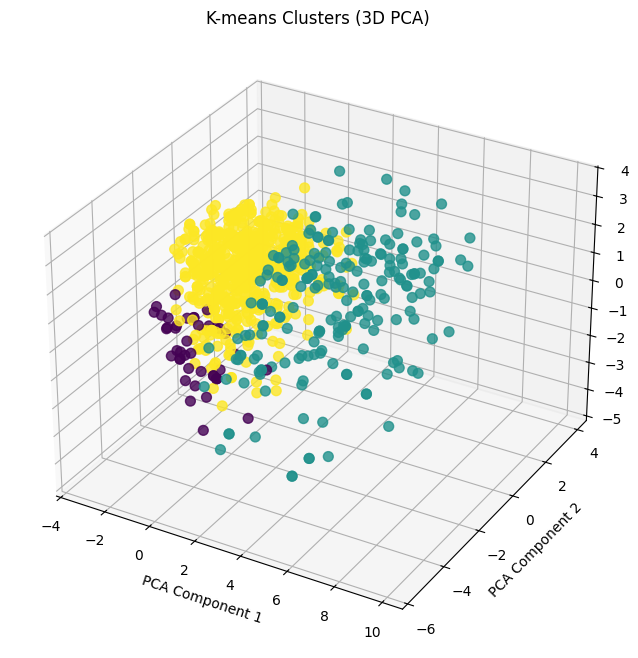

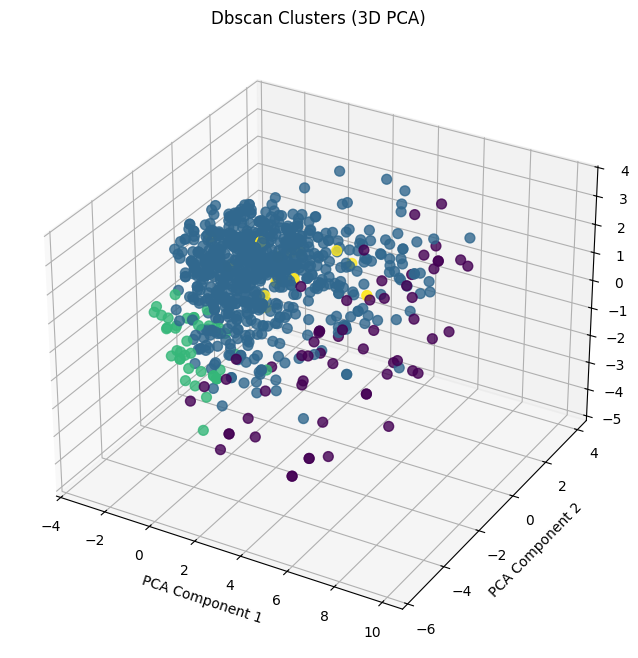

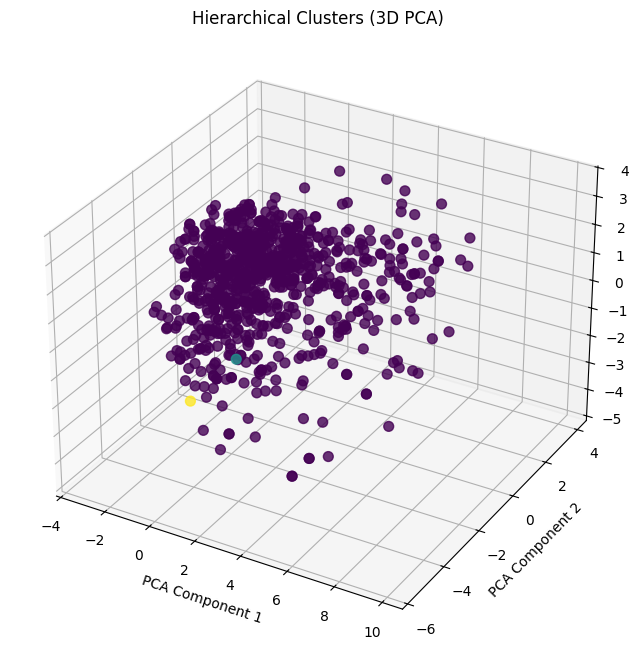

In [17]:
# @title 3D cluster visualization

import matplotlib.pyplot as plt
# Perform PCA with 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_df)

def plot_3d_clusters(labels, method_name):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2],
               c=labels, cmap='viridis', s=50, alpha=0.8)
    ax.set_title(f'{method_name.capitalize()} Clusters (3D PCA)')
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.set_zlabel('PCA Component 3')
    plt.show()


# Plot 3D visualizations for each clustering method
plot_3d_clusters(kmeans_labels, 'K-Means')
plot_3d_clusters(dbscan_labels, 'DBSCAN')
plot_3d_clusters(agg_labels, 'Hierarchical')


In [18]:
# @title Cluster Characterization

def characterize_clusters(labels, method_name):
    df[f'{method_name}_Cluster'] = labels
    # Exclude the cluster label column from the mean calculation
    cluster_profile = df.drop(columns=[col for col in df.columns if '_Label' in col]).groupby(f'{method_name}_Cluster').mean()

    print(f"\n{method_name.capitalize()} Cluster Profiles:")
    print(cluster_profile[['Income', 'MntWines', 'MntMeatProducts',
                          'NumDealsPurchases', 'NumWebPurchases']])

    # Removed the code that assigns cluster labels
    '''
    if method_name == 'kmeans':
        labels_map = {
            0: "High-Value Customers", #Big Spenders
            1: "Low-Value Customers", #Budget-Conscious Shoppers (4 cluster)"Premium Customers",
            2: "Deal Seekers",
            3: "Regular Shoppers"
        }
        df[f'{method_name}_Cluster_Label'] = df[f'{method_name}_Cluster'].map(labels_map)
    '''
    # Print Cluster Distributions:
    print(f"\n{method_name.capitalize()} Cluster Distributions:")
    print(df[f'{method_name}_Cluster'].value_counts())

    # Removed the code that prints cluster distribution labels
    '''
    if method_name == 'kmeans':
        print(f"\n{method_name.capitalize()} Cluster Distribution Labels:")
        print(df[f'{method_name}_Cluster_Label'].value_counts())
    '''
    return cluster_profile

# Define cluster_results before using it
# Assuming you have labels for 'kmeans', 'dbscan', and 'hierarchical' methods
cluster_results = {
    'kmeans': [kmeans_labels],  # Store labels for each method
    'dbscan': [dbscan_labels],
    'hierarchical': [agg_labels]  # Use agg_labels if you have them
}

# Characterize all methods
for method in cluster_results.keys():
    characterize_clusters(cluster_results[method][0], method)

    # Removed the code that prints cluster distribution labels
    '''
    if method == 'kmeans':
         print(f"\n{method.capitalize()} Cluster Distribution Labels:")
         print(df[f'{method}_Cluster_Label'].value_counts())
    '''


Kmeans Cluster Profiles:
                      Income    MntWines  MntMeatProducts  NumDealsPurchases  \
kmeans_Cluster                                                                 
0               20362.738095    2.666667         7.452381           1.666667   
1               43208.990385  105.625000        48.384615           2.855769   
2               33203.686757   21.314092        12.370119           1.701188   

                NumWebPurchases  
kmeans_Cluster                   
0                      1.595238  
1                      3.658654  
2                      1.585739  

Kmeans Cluster Distributions:
kmeans_Cluster
2    589
1    208
0     42
Name: count, dtype: int64

Dbscan Cluster Profiles:
                      Income    MntWines  MntMeatProducts  NumDealsPurchases  \
dbscan_Cluster                                                                 
-1              43323.416667  104.366667        62.966667           2.833333   
 0              35003.044952   38.3319

In [19]:
# @title Validate the clusters using PERMANOVA

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import pandas as pd

# Fit the model Income using the original DataFrame 'df'
print("Income PREMANOVA:")
model = ols('Income ~ C(kmeans_tuned_Cluster)', data=df).fit()
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Fit the model MntWines
print()
print("Amount spent on Wines PREMANOVA:")
model = ols('MntWines ~ C(kmeans_tuned_Cluster)', data=df).fit()
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Fit the model MntMeatProducts
print()
print("Amount spent on Meat Products PREMANOVA:")
model = ols('MntMeatProducts ~ C(kmeans_tuned_Cluster)', data=df).fit()
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Fit the model NumWebPurchases
print()
print("Amount spent on Web Purchases PREMANOVA:")
model = ols('NumWebPurchases ~ C(kmeans_tuned_Cluster)', data=df).fit()
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Fit the model NumDealsPurchases
print()
print("Number of Purchases PREMANOVA:")
model = ols('NumDealsPurchases ~ C(kmeans_tuned_Cluster)', data=df).fit()
anova_table = anova_lm(model, typ=2)
print(anova_table)

Income PREMANOVA:
                               sum_sq     df           F        PR(>F)
C(kmeans_tuned_Cluster)  2.491420e+10    2.0  106.292125  7.413646e-42
Residual                 9.797654e+10  836.0         NaN           NaN

Amount spent on Wines PREMANOVA:
                               sum_sq     df           F         PR(>F)
C(kmeans_tuned_Cluster)  1.158597e+06    2.0  366.932167  4.091255e-115
Residual                 1.319845e+06  836.0         NaN            NaN

Amount spent on Meat Products PREMANOVA:
                                sum_sq     df           F         PR(>F)
C(kmeans_tuned_Cluster)  207554.742868    2.0  389.200729  3.415071e-120
Residual                 222912.949623  836.0         NaN            NaN

Amount spent on Web Purchases PREMANOVA:
                             sum_sq     df           F         PR(>F)
C(kmeans_tuned_Cluster)  671.786314    2.0  332.786746  4.850071e-107
Residual                 843.803674  836.0         NaN            NaN

Numbe